In [10]:
import pandas as pd
from CompareGroupsFunctions import *
import matplotlib.pyplot as plt
import seaborn as sns
from EstimateParameters import fit_icc_itens

ano = '2019'
gp_feat = 'CLASSE'
gp_name = 'classe'
gp_map = {'alta': '2+ MW',
          'média': '1/2-2 MW',
          'baixa': '0-1/2 MW'
          }

df_grupo = pd.read_csv("../Data/Processed/ENEM"+str(ano)+"/All_grupos.csv")
nu_grupo = df_grupo['NU_INSCRICAO'].tolist()

In [27]:
comp = 'LC'

lc_comp = GroupComparator(comp=comp, ano=ano, gp_feat=gp_feat, gp_name=gp_name, gp_map=gp_map)
df_gp = lc_comp.get_df_gp()

item_ing = ['Item 55166', 'Item 54110', 'Item 23564', 'Item 31954', 'Item 118180']
item_esp = ['Item 96705', 'Item 118222','Item 39016', 'Item 118167', 'Item 48558']

df_gp_ing = {}
df_gp_esp = {}
df_gp_pt = {}

for g in df_gp.keys():
    df_gp_ing[g] = df_gp[g][df_gp[g]['TP_LINGUA']==0][['NU_INSCRICAO','NU_NOTA_LC']].copy()
    df_gp_esp[g] = df_gp[g][df_gp[g]['TP_LINGUA']==1][['NU_INSCRICAO','NU_NOTA_LC']].copy()
    df_gp_pt[g] = df_gp[g][['NU_INSCRICAO','NU_NOTA_LC']].copy()
    
    for col in df_gp[list(df_gp.keys())[0]].columns:
        if col in item_ing:
            df_gp_ing[g][col] = df_gp[g][df_gp[g]['TP_LINGUA']==0][col]
        elif col in item_esp:
            df_gp_esp[g][col] = df_gp[g][df_gp[g]['TP_LINGUA']==1][col]
        elif col!='NU_INSCRICAO' and col!='NU_NOTA_LC' and col!='TP_LINGUA':
            df_gp_pt[g][col] = df_gp[g][col]
    

In [28]:
lc_comp_ing = GroupComparator(comp=comp, ano=ano, gp_feat=gp_feat, gp_name=gp_name, gp_map=gp_map)
lc_comp_ing.df_gp = df_gp_ing

In [29]:
bin_lc_ing = lc_comp_ing.bin_scores(nota_min=350, nota_max=760, step=15)

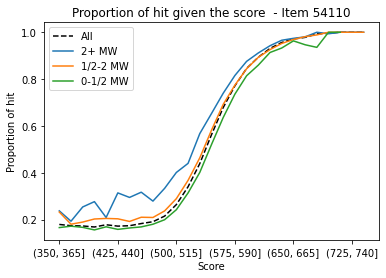

In [30]:
lc_comp_ing.plot_item_compar(item = 'Item 54110')

In [31]:
q_bin = bin_lc_ing['baixa'][['Item 54110']].copy()
q_bin['Grade'] = [i+15/2 for i in np.arange(350, 750, 15)]
q_bin = q_bin.fillna(1)
q_bin['Chance of correct answer'] = q_bin['Item 54110']
q_bin = q_bin.reset_index(drop=True)
q_bin = q_bin[['Grade','Chance of correct answer']]

In [32]:
bin_lc_ing['baixa'][['Item 54110']]

,Item 54110
RangeLC,
"(350, 365]",0.165923
"(365, 380]",0.171923
"(380, 395]",0.166918
"(395, 410]",0.155973
"(410, 425]",0.169253
"(425, 440]",0.158282
"(440, 455]",0.164291
"(455, 470]",0.168884
"(470, 485]",0.180221


In [35]:
icc_par_ing = fit_icc_itens(bin_lc_ing, nota_min=350, nota_max=760, step=15)

In [43]:
a,b,c = icc_par_ing.loc['Item 54110',['Dscrmn_baixa','Dffclt_baixa','Gussng_baixa']]

In [91]:
a,b,c

(0.0351588906803025, 562.062800634427, 0.15263310649220943)

In [47]:
x = np.arange(350, 750, 1)
y = [c+(1-c)/(1+np.exp(-a*(o-b))) for o in x]

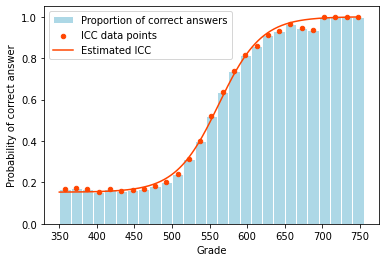

In [90]:
plt.bar(q_bin['Grade'], q_bin['Chance of correct answer'], width=15, edgecolor="white", color='lightblue', 
        zorder=1, label='Proportion of correct answers')
plt.plot(x,y, linewidth=1.5, color='orangered', zorder=2, label='Estimated ICC')
plt.scatter(q_bin['Grade'], q_bin['Chance of correct answer'], color='orangered', s=20, zorder=3, 
            label='ICC data points')

handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

plt.xlabel('Grade')
plt.ylabel('Probability of correct answer')

plt.savefig('ExampleObservedAUC&EstimatedICC.png', format='png', dpi=1200)